 <br>

# Measuring well-being: Investigating data from the Better Life Index
## DSCI 521: Data Analysis and Interpretation Term Project


## Introduction<br>Measuring Well-Being: A discussion of our analysis and whom it will support

"What gets measured gets done" is a common saying in international development. There are many organizations today interested in defining, quantifying and measuring various aspects of life for people around the world and in creating policies to help societies and individuals thrive.

Recently, there has been a proliferation of ranking indices across various industries, including business, education, health, and international development. These are “composite indicators”, which are “formed when individual indicators are compiled into a single index, on the basis of an underlying model of the multi-dimensional concept that is being measured" (OECD, 2013). Many composite indices exist, including:<br><br>
Air Quality Index (WEF)<br>
Corruption Perception Index (Transparency International)<br>
Doing Business Indicators (World Bank)<br>
Happy Planet Index (New Economic Foundation)<br>
Human Development Index (United Nations Development Program)<br>
Human Poverty Index (United Nations Development Program)<br>
Globalization Index (Foreign Policy Magazine)<br>

Composite indices provide a simple, comprehensible view of multi-faceted issues and are often used by international NGOs and policy makers. They are seen as an important step away from just Gross Domestic Product (GDP) as a way to measure human development (Mazziotta & Pareto, 2013). However, these rankings are often criticized because of possible inaccuracies and questionable or opaque methodological choices, particularly in weighting and aggregation, as well as potential oversimplication. Some scholars even go so far as to call international indices and rankings "dangerous" as "they stimulate rank-seeking behavior by emphasizing country differences where similarity is dominant" (Hoyland, Moene, &  Willumsen, 2009, p.1). Composite index creation is a complex process that fundamentally hinges on two components: the data being selected, and the framework and methods being applied to create the ranking.  

Initially, we aimed to complete a composite index of our own, using different statistical methods. However, as we learned of the myriad methods possible in index creation, the project's timeframe seemed too limited. In addition, while there is value in trying to measure well-being to set policy priorities, we were left doubtful of a ranking's ability to positively affect change. Our team ultimately chose not to create an index of our own, but to examine a composite index dataset and explore insights gleaned from analyses performed on the data themselves. 

The dataset we chose was from the Organisation for Economic Cooperation and Development's Better Life Index, which examines well-being in 38 countries (35 OECD member countries and three partner countries). The OECD is an intergovernmental economy agency based in France responsible for research, policy briefings, and international tests like PISA.  Having debuted in 2011, the Better Life Index (BLI) is a well-known, “well-accepted” index that goes beyond economic indicators like GDP to measure well-being (Carvalhal Monteiro, Pereira, & Costa, 2018). Furthermore, it has the unique feature of customizability: on the [BLI website](http://www.oecdbetterlifeindex.org), users may adjust any of the 11 dimensions of well-being based on perceived importance to reveal different rankings. With the weights of the dimensions set equally, Norway is in the top spot, with South Africa in the bottom position. An image of this is provided below.

The BLI focuses on well-being, a concept open to interpretation. We started with the OECD's concept:

"Societal progress is about improvements in the well-being of people and households. Assessing such progress requires looking not only at the functioning of the economic system but also at the diverse experiences and living conditions of people. The OECD Framework for Measuring Well-Being and Progress... is built around three distinct domains: material conditions, quality of life and sustainability, each with their relevant dimensions" (OECD, 2019). Those dimensions are: housing, jobs, education, civic engagement, life satisfaction, work-life balance, income, community, environment, health, and safety. 

Upon examining the data, we felt additional measurements could be added to enhance analysis. While there was some subjectivity of course in what areas we wanted to expand, here we played the role of expert. Elements such as cost of living and healthcare coverage, which could be classified under 'material conditions,' were absent from the existing BLI data. In addition, life satisfaction contained just one indicator. We were interested in adding additional metrics of people's happiness or life satisfaction. 

We had two research questions for this project:

1. Do additional metrics add value to the data in the existing BLI data set?
2. What insights can be gleaned by performing comparison analyses (e.g. cosine similarity) on the BLI data? 

### Target Audience/Who Might Be Interested in Our Analysis

Our analysis would be of interest to governmental and non-governmental organizations, particularly the EU, OECD, and the Joint Research Centre of the European Commission. There is a also a robust scholarly community working on issues of measurement in social science, so publications like *Social Indicators Research* and* The Review of Income and Wealth* may also be interested in new findings that add perspective to this issue. 

Given that our analysis could be of interest to those with technical and non-technical backgrounds, providing a short, comprehensible report, along with clear visualizations, is essential. This follows the model set by the OECD's Better Life Index as well.  As can be seen on the BLI [website](http://www.oecdbetterlifeindex.org/), readers may interact with the data and access various visualizations, reports, country reports, etc. We will also provide clear steps of analysis completed. 

### How the analysis might fit into an application or investigation

If our analysis provides support for the current metric, it would be a helpful outside validation. If the analyses do not provide support, either by a contradiction of how the OECD currently calculates, or by providing a different model than what the OECD uses then it could be helpful for their future use. 




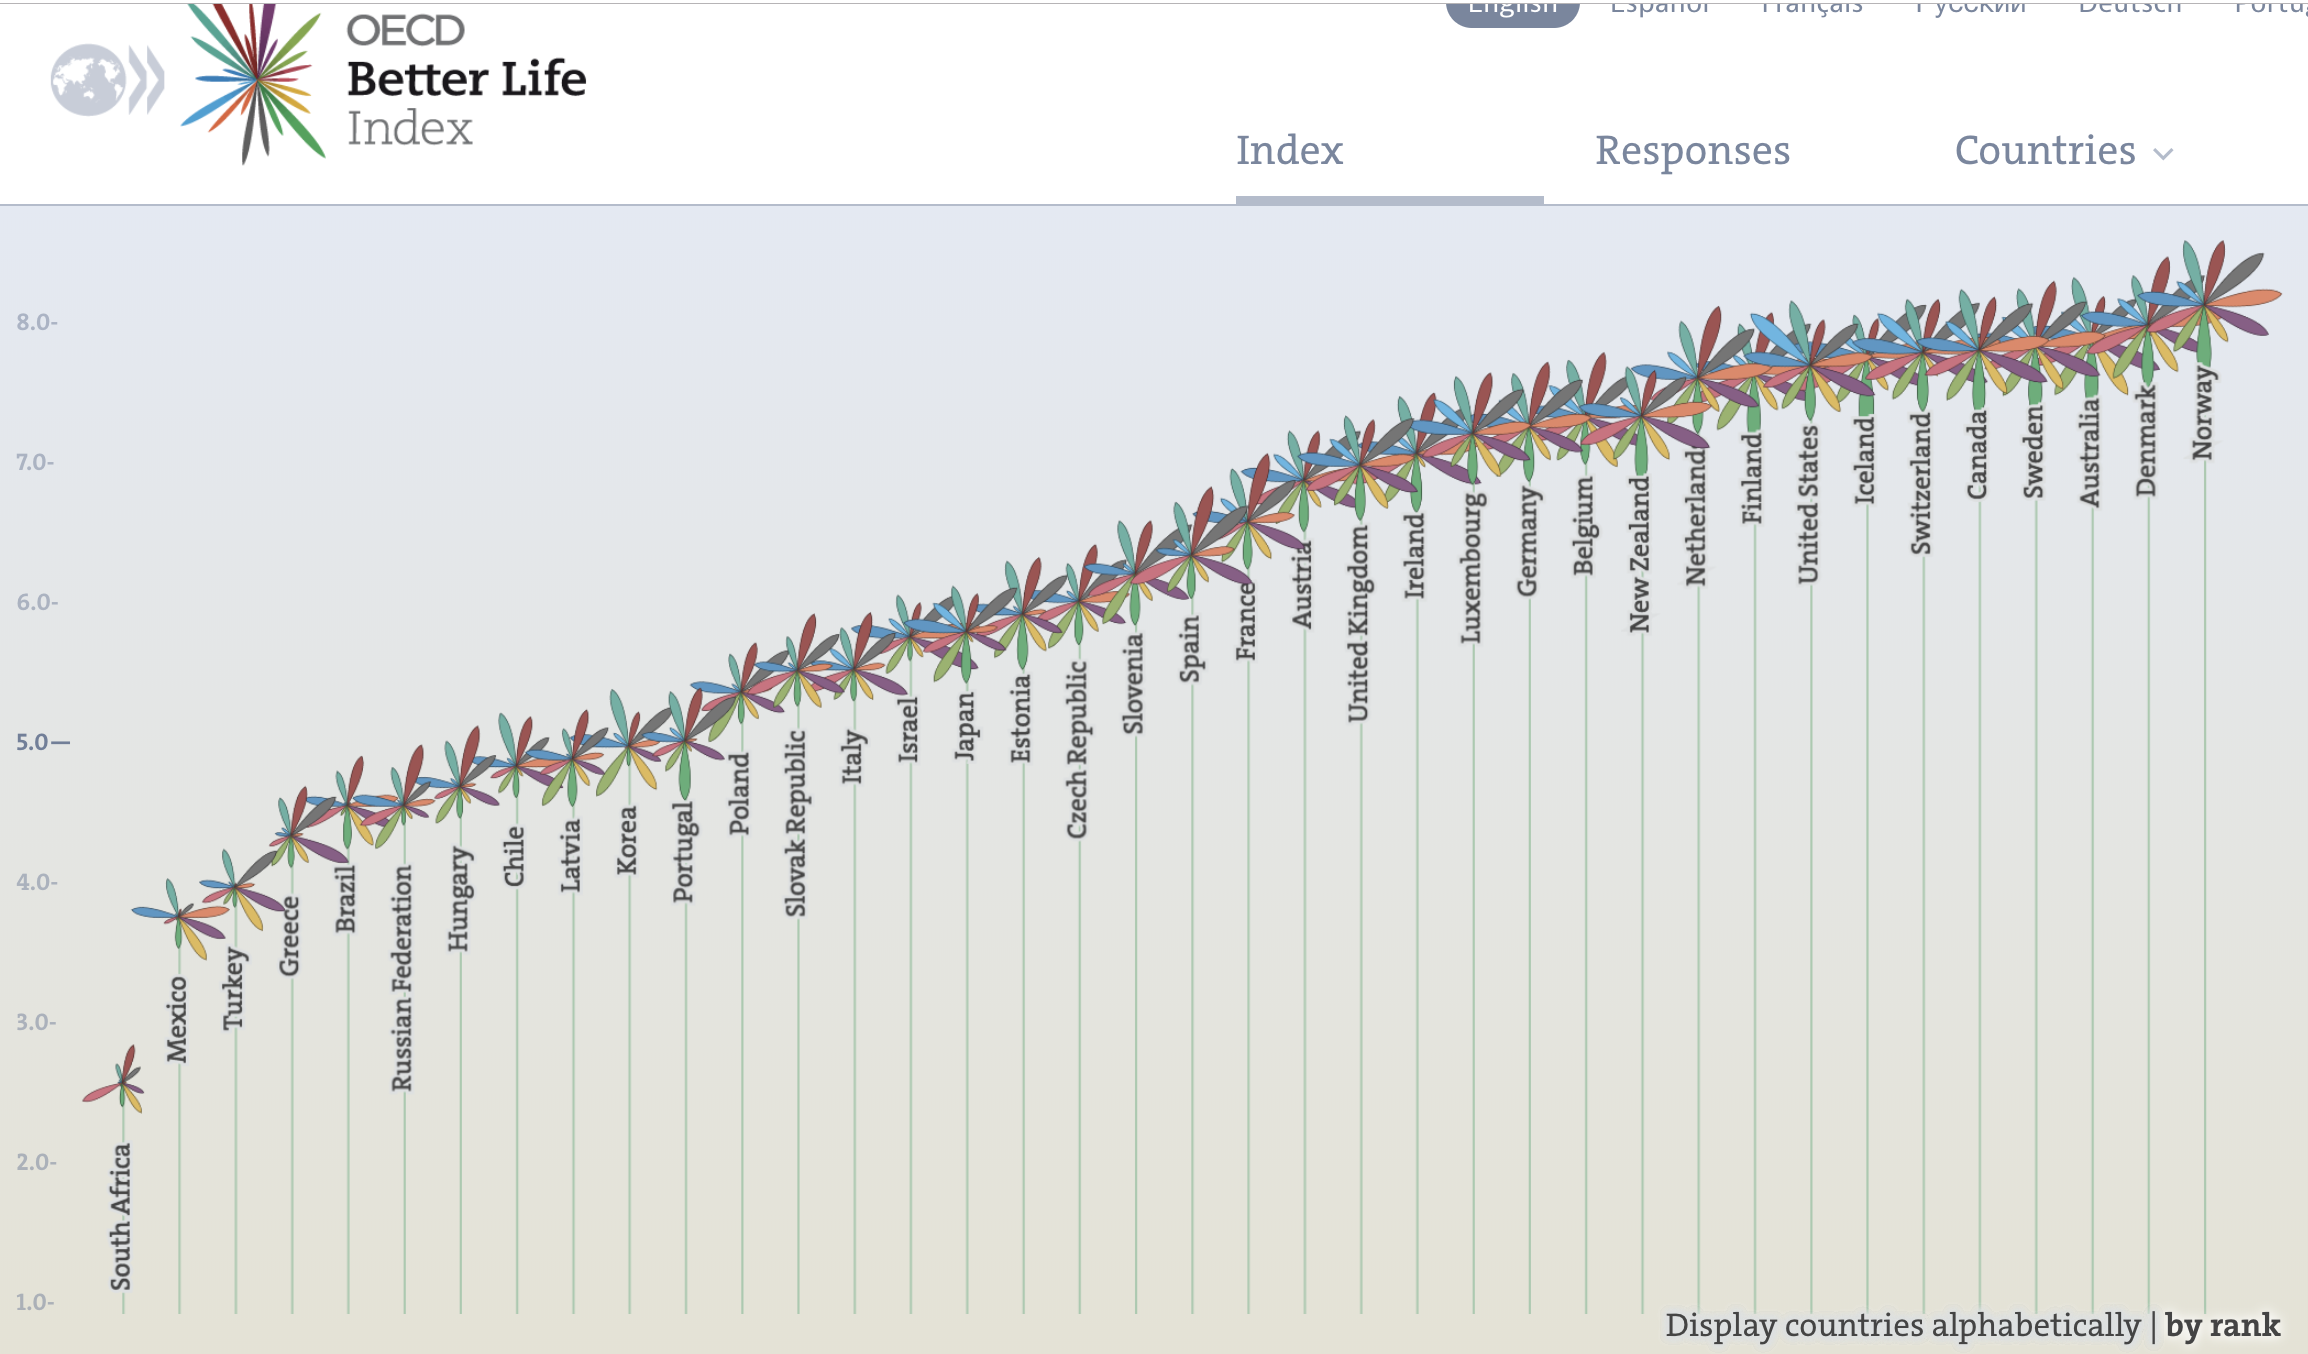

## Data Descriptions

### **3. Describing the BLI: An exhibition of analyses from dataset(s) explored, including visual analyses, captions, and useful descripitions**


The following cell contains some of the OECD data. The OECD data contains information for about 35 countries. The image only displays a portion of the data. In the BLI data set, available [here](https://stats.oecd.org/index.aspx?DataSetCode=BLI), contains 24 indicators which have been organized into 11 different dimensions. 

![alt text](https://docs.google.com/uc?export=download&id=1NabMhphZlN5BFuY0MqTmrMSSTFeO5349)


The data used to create the BLI is the from [OECD.Stat website](https://stats.oecd.org/index.aspx?DataSetCode=BLI) and is recreated below. There are 24 indicators, and we have identified the following important features (columns): unit of measurement, whether it is objective or subjective, positive or negative polarity, source of the information, year or years, and a definition of the concept. There are several factors worth noting with this data:
1.Though the indicators are all numeric, they are in different units, requiring normalization for certain analyses.
2. Some have positive polarity while others have negative polarity, which would need to be addressed in any aggregation were to be done 
3. Some indicators are objective measures (e.g. life expectancy) and some are subjective (e.g. life satisfaction), which could prove important in the analysis phase. Objective and subjective measures are considered important in creating a well-being CI. 
4. The OECD's own databases provide the majority of the data.
5. There is some variability in the year or years being taken, depending on the indicator. 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
df = pd.read_csv("drive/My Drive/DSCI521_project/OECD_BLI_Indicator_Descriptive_Chart.csv")
df.drop(df.columns[df.columns.str.contains('Unnamed', case=False)],
          axis=1, inplace=True)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows #changed it show it shows all text in all cells with word wrapping!
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Indicator,Unit,Objective or subjective measure,Positive or Negative Polarity,Source,Year,Description of concept
0,Dwellings without basic facilities,Percentage,Objective,Negative,"European Union Statistics on Income and Living Conditions (EU-SILC), National Statistical Offices.","2015 with the exception of 2016 for Hungary and Latvia; the Russian federation; 2014 for the Russian Federation; 2013 for the United States; 2010 for Brazil, Korea, Mexico; 2008 for Japan; 2001 for Chile; 1997 for Canada",This indicator refers to the percentage of the population living in a dwelling without indoor flushing toilet for the sole use of their households
1,Housing Expediture,Percentage,Objective,Negative,OECD calculations based on OECD National Accounts Database.,"2015 with the exception of 2016 for Canada, Denmark, the United Kingdom; 2014 for Italy, New Zealand, Norway; and 2013 for Switzerland","This indicator considers the expenditure of households in housing and maintenance of the house, as defined in the SNA (P31CP040: Housing, water, electricity, gas and other fuels; P31CP050: Furnishings, households’ equipment and routine maintenance of the house)."
2,Rooms per person,Ratio,Objective,Positive,"European Union Statistics on Income and Living Conditions (EU-SILC), National Statistical Offices and OECD's calculations.","2015 with the exception of 2016 for Finland, Hungary and Latvia; 2014 for Israel, Japan and Switzerland; 2013 for New Zealand and Switzerland; 2011 for Canada, Chile; and 2010 for Korea.",Rate (number of rooms divided by the number of people living in the dwelling).
3,Household net adjusted disposable income,US Dollar,Objective,Positive,OECD calculations based on OECD National Accounts Statistics (database) and OECD Income Distribution and Poverty database (for socio-economic inequality),2015 for all countries,"maximum amount that a household can afford to consume without having to reduce its assets or to increase its liabilities. It's obtained adding to people’s gross income (earnings, self-employment and capital income, as well as current monetary transfers received from other sectors) the social transfers in-kind that households receive from governments (such as education and health care services), and then subtracting the taxes on income and wealth, the social security contributions paid by households as well as the depreciation of capital goods consumed by households."
4,Household net financial wealth,US Dollar,Objective,Positive,OECD calculations based on theOECD National Accounts Statistics (database,"2015 for all countries, with the exception of 2014 for Brazil, Japan and Spain.","Net financial wealth consists of : currency and deposits, securities other than share, loans, shares and other equity (including shares issued by investment funds), insurance technical reserves, and other accounts receivable or payable, net of household financial liabilities, as defined by the System of National Accounts – SNA."
5,Labour market insecurity,Percentage,Objective,Negative,OECD Job quality database,2015 with the exception of 2011 for Chile.,"This indicator is defined in terms of the expected earnings loss, measured as the percentage of the previous earnings, associated with unemployment. This loss depends on the risk of becoming unemployed, the expected duration of unemployment and the degree of mitigation against these losses provided by government transfers to the unemployed (effective insurance)."
6,Employment rate,Percentage,Objective,Positive,OECD Labour Force Statistics Database,2016 with the exception of 2015 for Brazil.,"number of employed persons aged 15 to 64 over the population of the same age. Employed people are those aged 15 or more who report that they have worked in gainful employment for at least one hour in the previous week, as defined by the International Labour Organization – ILO."
7,Long-term unemployment rate,Percentage,Objective,Negative,OECD calculations based on the OECD Labour Force Statistics Da

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Indicator                        24 non-null     object
 1   Unit                             24 non-null     object
 2   Objective or subjective measure  24 non-null     object
 3   Positive or Negative Polarity    24 non-null     object
 4   Source                           24 non-null     object
 5   Year                             24 non-null     object
 6   Description of concept           24 non-null     object
dtypes: object(7)
memory usage: 1.5+ KB


# **PHASE 2**

# Set-up

In [4]:
!pip install plotly==3.10.0

In [5]:
import numpy as np
import pandas as pd
from pprint import pprint
import re
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn import preprocessing
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import time
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.plotly as py #For World Map
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

from google.colab import drive
drive.mount('/content/drive/')
sns.set_style("white")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [6]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
  #this allows plotly to work in google colab. Not necessary for jupyter notebooks

# Acquisition and Preprocessing

The OECD csv file was a little "messy". The first obstacle was finding the right encoding value so that the data could successfully be read in to a pandas DataFrame from the CSV. The other issue with the data was that it had nested headers and also had a row with one entry to describe the Country data for each row.  Using the `header=` argument in `read_csv`, we were able to read in both headers rows. The first header row described the category and the second header described the unit in which the data was recorded for that category (i.e. `(Housing, Dwellings without basic facilities, Percentage)`).  From there, the index was reset to the column containing the country information to make this DataFrame compatible with the other data sets in terms of joins. 

In [7]:
oecd_file = 'drive/My Drive/DSCI521_project/test.csv'
oecd_data = pd.read_csv(oecd_file, encoding ='latin1', header=0)

In [8]:
def reset_oecd_idx(data):
    data.set_index(data.columns[0], inplace=True)
    data.index.rename('Country', inplace=True)
    return data

In [9]:
roecd_data=reset_oecd_idx(oecd_data)

In [10]:
roecd_data.head()

,"(Housing, Dwellings without basic facilities, Percentage)","(Housing, Housing expenditure, Percentage)","(Housing, Rooms per person, Ratio)","(Income, Household net adjusted disposable income, US Dollar)","(Income, Household net financial wealth, US Dollar)","(Jobs, Labour market insecurity, Percentage)","(Jobs, Employment rate, Percentage)","(Jobs, Long-term unemployment rate, Percentage)","(Jobs, Personal earnings, US Dollar)","(Community, Quality of support network, Percentage)","(Education, Educational attainment, Percentage)","(Education, Student skills, Average score)","(Education, Years in education, Years)","(Environment, Air pollution, Micrograms per cubic metre)","(Environment, Water quality, Percentage)","(Civic engagement, Stakeholder engagement for developing regulations, Average score)","(Civic engagement, Voter turnout, Percentage)","(Health, Life expectancy, Years)","(Health, Self-reported health, Percentage)","(Life Satisfaction, Life satisfaction, Average score)","(Safety, Feeling safe walking alone at night, Percentage)","(Safety, Homicide rate, Ratio)","(Work-Life Balance, Employees working very long hours, Percentage)","(Work-Life Balance, Time devoted to leisure and personal care, Hours)"
Country,,,,,,,,,,,,,,,,,,,,,,,,
Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,94,80,502,21.2,5,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35
Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,92,85,492,17.1,16,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55
Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,92,75,503,18.2,15,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77
Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,93,91,523,16.7,7,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41
Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,84,65,443,17.3,16,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90


## Adding Cost of Living Index


As displayed in `cost_of_living.head()`, the Cost of Living Index presented its own challenges. First and foremost, the data was categorized by city rather than country. So to make the cost of living data compatible with the OECD data, we had to add a column to the data that contained countries by grabbing everything after the last comma in the `cost_of_living['City']` (assuming no country name is separated by commas). Then we grouped by country and took the average values for each country. The average for each country is what gets joined with the OECD data.  

The Cost of Living Index mostly describes how expensive a certain country is. It is important to remember that this data, due to its nature of being averaged, may be skewed. For instance, the average cost of living in New York City, Los Angeles, and San Francisco will be much higher than that of rural areas. Since a lot of this data was reported on cities, the Cost of Living for each country is most likely higher that the actualy cost of living for a given countries. Because ALL countries' averages were calculated using the same value, hopefully the data still portrays an accurate story of cost of living per country. 





In [11]:
cost_of_living = pd.read_csv('drive/My Drive/DSCI521_project/Cost_of_Living_Index_2019.csv')

In [12]:
cost_of_living.head()

,Rank,City,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,"Basel, Switzerland",131.37,45.62,90.19,127.40,128.41,132.50
1,2,"Zurich, Switzerland",126.87,59.72,94.62,128.53,126.15,139.94
2,3,"Lausanne, Switzerland",123.42,48.62,87.50,128.21,120.11,127.20
3,4,"Bern, Switzerland",123.17,39.37,82.93,122.06,114.49,129.54
4,5,"Geneva, Switzerland",118.87,67.10,94.01,116.00,123.04,126.36


In [13]:
def get_avg_coli_per_country(filtered_coli, countries):
    common_coli_data = cost_of_living[filtered_coli.index.isin(countries)]
    grouped = common_coli_data.groupby('Country')
    avg_coli = grouped['Cost of Living Index'].agg(np.mean).to_frame()
    return avg_coli
    

In [14]:
def get_countries(location):
    country = re.split(',', location)
    return country[-1].strip()

In [15]:
def add_country_col(data):
    coli_countries = list(map(get_countries, list(data.City)))
    data['Country'] = coli_countries
    data = data[['Country', 'Cost of Living Index']]
    data.set_index('Country', inplace=True)
    return data

In [16]:
def combine_data(oecd, coli):
    #avg_coli = get_avg_coli_per_country(coli) #get_avg_coli_per_country takes two arguments, but only 1 is here.
    avg_coli = get_avg_coli_per_country(coli, set(coli.index.values).intersection(set(oecd.index.values))) #this is the edit to fix above issue
    combined = oecd.join(avg_coli, how='inner')
  
    missing_in_coli = set(oecd.index.values) - set(combined.index.values)
    
    if combined.shape[0] == 0: #hanged this to a ==, was a =
        raise Exception('Inside combine_data() '
                        'Inner Join on OECD and COLI was unsuccessful.')
    
    return combined, missing_in_coli

In [17]:
cost_of_living_ = add_country_col(cost_of_living)

In [18]:
combined, missing = combine_data(roecd_data, cost_of_living_)
combined.head(5)

,"(Housing, Dwellings without basic facilities, Percentage)","(Housing, Housing expenditure, Percentage)","(Housing, Rooms per person, Ratio)","(Income, Household net adjusted disposable income, US Dollar)","(Income, Household net financial wealth, US Dollar)","(Jobs, Labour market insecurity, Percentage)","(Jobs, Employment rate, Percentage)","(Jobs, Long-term unemployment rate, Percentage)","(Jobs, Personal earnings, US Dollar)","(Community, Quality of support network, Percentage)","(Education, Educational attainment, Percentage)","(Education, Student skills, Average score)","(Education, Years in education, Years)","(Environment, Air pollution, Micrograms per cubic metre)","(Environment, Water quality, Percentage)","(Civic engagement, Stakeholder engagement for developing regulations, Average score)","(Civic engagement, Voter turnout, Percentage)","(Health, Life expectancy, Years)","(Health, Self-reported health, Percentage)","(Life Satisfaction, Life satisfaction, Average score)","(Safety, Feeling safe walking alone at night, Percentage)","(Safety, Homicide rate, Ratio)","(Work-Life Balance, Employees working very long hours, Percentage)","(Work-Life Balance, Time devoted to leisure and personal care, Hours)",Cost of Living Index
Country,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,94,80,502,21.2,5,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35,71.482500
Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,92,85,492,17.1,16,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55,73.040000
Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,92,75,503,18.2,15,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77,72.627500
Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,93,91,523,16.7,7,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41,65.574444
Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,84,65,443,17.3,16,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90,50.620000


## Adding Happy Life Years

The Happy Life Years index was already nicely oriented with an inner join. It is worth noting that recording the missing data is useful because it is a way of double checking that the merge was successful. If there are countries that were missed due to spelling or maybe they even had a lower case instead of an upper case, the missing data would store those countries. 

The data set provides the recording units for each column where applicable. It is important to note that `HLI_Data['Footprint']`, lower values may equate to better quality of life due to affects on environment. 

The columns that contain Inequality data refer to data that has been standardized in some way using the standard deviation. The Inequality (standard deviation) is used to adjust Wellbeing. It may be worthwhile to use the adjusted wellbeing as opposed to the average wellbeing, which doesn't take into account potential outliers that can skew the data in one direction or the other.  

In [19]:
HLI_Data = pd.read_csv('drive/My Drive/DSCI521_project/HLI.csv')

In [20]:
reset_oecd_idx(HLI_Data)
HLI_Data.head()

,HPI Rank,Average Life \nExpectancy,Average Wellbeing\n(0-10),Happy Life Years,Footprint\n(gha/capita),Inequality of Outcomes (%),Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index
Country,,,,,,,,,
Afghanistan,110,59.7,3.8,12.4,0.8,43,38.3,3.4,20.2
Albania,13,77.3,5.5,34.4,2.2,17,69.7,5.1,36.8
Algeria,30,74.3,5.6,30.5,2.1,24,60.5,5.2,33.3
Argentina,19,75.9,6.5,40.2,3.1,16,68.3,6.0,35.2
Armenia,73,74.4,4.3,24.0,2.2,22,66.9,3.7,25.7


In [21]:
def combine_data_HLI(oecd, hli): #changed 3/20 to streamline the code in line with the previous function, it removed 3 extra lines
    common_countries = set(hli.index.values).intersection(set(oecd.index.values))
    missing_in_hli = set(oecd.index.values)-common_countries

    common_oecd = oecd[oecd.index.isin(common_countries)]

    combined = common_oecd.join(hli, how='inner')

    return combined, missing_in_hli

In [22]:
combined, dropped_co = combine_data_HLI(combined,HLI_Data)

In [23]:
combined.head()

,"(Housing, Dwellings without basic facilities, Percentage)","(Housing, Housing expenditure, Percentage)","(Housing, Rooms per person, Ratio)","(Income, Household net adjusted disposable income, US Dollar)","(Income, Household net financial wealth, US Dollar)","(Jobs, Labour market insecurity, Percentage)","(Jobs, Employment rate, Percentage)","(Jobs, Long-term unemployment rate, Percentage)","(Jobs, Personal earnings, US Dollar)","(Community, Quality of support network, Percentage)","(Education, Educational attainment, Percentage)","(Education, Student skills, Average score)","(Education, Years in education, Years)","(Environment, Air pollution, Micrograms per cubic metre)","(Environment, Water quality, Percentage)","(Civic engagement, Stakeholder engagement for developing regulations, Average score)","(Civic engagement, Voter turnout, Percentage)","(Health, Life expectancy, Years)","(Health, Self-reported health, Percentage)","(Life Satisfaction, Life satisfaction, Average score)","(Safety, Feeling safe walking alone at night, Percentage)","(Safety, Homicide rate, Ratio)","(Work-Life Balance, Employees working very long hours, Percentage)","(Work-Life Balance, Time devoted to leisure and personal care, Hours)",Cost of Living Index,HPI Rank,Average Life \nExpectancy,Average Wellbeing\n(0-10),Happy Life Years,Footprint\n(gha/capita),Inequality of Outcomes (%),Inequality-adjusted Life Expectancy,Inequality-adjusted Wellbeing,Happy Planet Index
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,1.1,20,2.3,33417,57462,4.3,72,1.36,52063,94,80,502,21.2,5,92,2.7,91,82.5,85,7.3,63.6,1.0,13.20,14.35,71.482500,105,82.1,7.2,53.1,9.3,8,78.6,6.9,21.2
Austria,1.0,21,1.6,32544,59574,2.7,72,1.94,48295,92,85,492,17.1,16,93,1.3,75,81.3,70,7.0,80.7,0.4,6.78,14.55,73.040000,43,81.0,7.4,54.4,6.1,7,78.0,7.1,30.5
Belgium,2.3,21,2.2,29968,104084,4.8,62,3.98,49587,92,75,503,18.2,15,84,2.2,89,81.1,75,6.9,70.7,1.0,4.31,15.77,72.627500,87,80.4,6.9,49.5,7.4,9,77.2,6.6,23.7
Canada,0.2,22,2.5,29850,85758,3.9,73,0.81,48403,93,91,523,16.7,7,91,3.0,68,81.5,88,7.3,80.9,1.4,3.73,14.41,65.574444,85,81.7,7.4,53.9,8.2,9,77.8,7.1,23.9
Chile,9.4,18,1.9,16588,21409,8.1,62,2.02,28434,84,65,443,17.3,16,69,1.5,49,79.1,57,6.7,51.1,4.5,10.06,14.90,50.620000,35,81.1,6.6,44.7,4.4,14,74.9,6.1,31.7


## Adding World Bank Healthcare by Country data

The World Bank Healthcare was also recorded on a per country basis, so an inner join was the best option. The data set contains one column of data, the data is a percentage of the population that has access to health care. The maximum number is 80%, as they do not make a fine grain distinction between 80-100%.

In [24]:
UHC_Data = pd.read_csv('drive/My Drive/DSCI521_project/UHCData.csv')

In [25]:
reset_oecd_idx(UHC_Data)
UHC_Data.head()

,Health Care Coverage 2015
Country,
Chad,29
Madagascar,30
Mali,32
Mauritania,33
Niger,33


In [26]:
combined, dropped_co = combine_data_HLI(combined,UHC_Data) #code would be the same as the HLI, no need to redo the function

## Min-Max Normalization


In this section, we normalize the data using a Min-Max normalization of all the data except for the following `['Happy Planet Index','Cost of Living Index', 'HPI Rank']`. The min-max normalization is a method of standardization that maps y values to a 0 to 1 scale where `f(min)=0` and `f(max)=1`.
Standardizing the data helps 'rank' the countries scores and gives the index values some tangible meaning.


In [27]:
#Min-max normalization - norms data columns between 0 and 1
#does adds back in the columns that should not be normed


temp1 = combined.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
temp1_scaled = min_max_scaler.fit_transform(temp1)
combinedminmax = pd.DataFrame(temp1_scaled,columns=combined.columns, index = combined.index)
combinedminmax = combinedminmax.drop(['Happy Planet Index', 'HPI Rank'], axis=1)
combinedminmax['Happy Planet Index'] = combined['Happy Planet Index']
combinedminmax['HPI Rank'] = combined['HPI Rank']


In [28]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
combinedminmax['Cost of Living Index']

Country
Australia          0.419581
Austria            0.436921
Belgium            0.432329
Canada             0.353806
Chile              0.187316
Czech Republic     0.125276
Denmark            0.538066
Estonia            0.197614
Finland            0.484961
France             0.466691
Germany            0.384324
Greece             0.241896
Hungary            0.093630
Iceland            0.761565
Ireland            0.436559
Israel             0.454373
Italy              0.405510
Japan              0.558607
South Korea        0.545358
Latvia             0.184532
Luxembourg         0.621732
Mexico             0.000000
Netherlands        0.451246
New Zealand        0.439482
Norway             0.749012
Poland             0.065853
Portugal           0.195137
Slovak Republic    0.146012
Slovenia           0.198560
Spain              0.242536
Sweden             0.425810
Switzerland        1.000000
Turkey             0.014751
United Kingdom     0.361977
United States      0.425595
Brazil      

# Analyses & Discussion


In an effort to provide evidence for the inclusion of the new variables, we have conducted several analyses. 

##Correlations Among Variables


To provide some background as to the relationship between variables, the simple correlation matrix is included below. This shows the strength and direction of relationship between two variables. Numbers closer to 1 and -1 show a high degree of trend similarity between the variables, while numbers close to 0 show a low degree of similarity. A value close to 1 indicates a similar direction of relationship, such that as one is increasing the other is increasing - alternatively, it could also be that as one is decreasing the other is decreasing. A value close to -1 indicates that the direction is divergent, so that as one variable is increasing or decreasing the other variable is decreasing or increasing. 

In this case, we wanted to check that our addtional variables were not too highly correlated with existing variables of the data set (excluding happy life years - which is a composite of already included varaibles). This helps provide evidence of meaningful inclusion of the additional variables. 

As well, looking at the correlations is important to determine what statistical methods we will use moving forward. Due to the higher correlations between some of the variables, we opted to look at cosine similarities and k-means clustering, rather than principal componant analysis or linear regression. The level of multicollinearity would be problematic for the latter, but not for the former.

In [29]:
cor = combinedminmax.corr()
#call just cor or corr to view entire correlation matrix
corr = pd.DataFrame(cor)
corr[['Cost of Living Index','Happy Life Years', 'Health Care Coverage 2015']]

,Cost of Living Index,Happy Life Years,Health Care Coverage 2015
"(Housing, Dwellings without basic facilities, Percentage)",-0.409980,-0.670784,-0.671044
"(Housing, Housing expenditure, Percentage)",0.036667,0.186824,0.095848
"(Housing, Rooms per person, Ratio)",0.598792,0.700454,0.620848
"(Income, Household net adjusted disposable income, US Dollar)",0.782382,0.757549,0.697007
"(Income, Household net financial wealth, US Dollar)",0.645307,0.577110,0.587535
"(Jobs, Labour market insecurity, Percentage)",-0.412898,-0.604444,-0.494116
"(Jobs, Employment rate, Percentage)",0.578141,0.695096,0.460959
"(Jobs, Long-term unemployment rate, Percentage)",-0.285737,-0.541645,-0.378447
"(Jobs, Personal earnings, US Dollar)",0.836072,0.829464,0.678786
"(Community, Quality of support network, Percentage)",0.461176,0.555794,0.416385


In [30]:

data_for_array = combined.reset_index()
roecd_data_array = combined.reset_index()




In [32]:
columns = ['(Housing,   Dwellings without basic facilities, Percentage)',
       '(Housing,   Housing expenditure, Percentage)',
       '(Housing,   Rooms per person, Ratio)',
       '(Income,   Household net adjusted disposable income, US Dollar)',
       '(Income,   Household net financial wealth, US Dollar)',
       '(Jobs,   Labour market insecurity, Percentage)',
       '(Jobs,   Employment rate, Percentage)',
       '(Jobs,   Long-term unemployment rate, Percentage)',
       '(Jobs,   Personal earnings, US Dollar)',
       '(Community,   Quality of support network, Percentage)',
       '(Education,   Educational attainment, Percentage)',
       '(Education,   Student skills, Average score)',
       '(Education,   Years in education, Years)',
       '(Environment,   Air pollution, Micrograms per cubic metre)',
       '(Environment,   Water quality, Percentage)',
       '(Civic engagement,   Stakeholder engagement for developing regulations, Average score)',
       '(Civic engagement,   Voter turnout, Percentage)',
       '(Health,   Life expectancy, Years)',
       '(Health,   Self-reported health, Percentage)',
       '(Life Satisfaction,   Life satisfaction, Average score)',
       '(Safety,   Feeling safe walking alone at night, Percentage)',
       '(Safety,   Homicide rate, Ratio)',
       '(Work-Life Balance,   Employees working very long hours, Percentage)',
       '(Work-Life Balance,   Time devoted to leisure and personal care, Hours)']

oecd_sim = []


for con1 in range(roecd_data_array.shape[0]):
    for con2 in range(roecd_data_array.shape[0]):
        if con1 != con2:
            con1_ = np.array(roecd_data_array.loc[con1,columns].fillna(0))
            con2_ = np.array(roecd_data_array.loc[con2,columns].fillna(0))
            similarity_val = con1_.dot(con2_) / (np.linalg.norm(con1_) * np.linalg.norm(con2_))
            oecd_sim.append((roecd_data_array.loc[con1,'Country'],roecd_data_array.loc[con2,'Country'],similarity_val))

pprint(oecd_sim[:4])



[('Australia', 'Austria', 0.9987093664732574),
 ('Australia', 'Belgium', 0.9508709962116986),
 ('Australia', 'Canada', 0.97204227220374),
 ('Australia', 'Chile', 0.9846927526124998)]


In [34]:
columns = ['(Health,   Life expectancy, Years)',
       '(Health,   Self-reported health, Percentage)',
       '(Life Satisfaction,   Life satisfaction, Average score)',
       '(Safety,   Feeling safe walking alone at night, Percentage)',
       'Happy Life Years']

Added_oecd_sub = []


for con1 in range(data_for_array.shape[0]):
    for con2 in range(data_for_array.shape[0]):
        if con1 != con2:
            con1_ = np.array(data_for_array.loc[con1,columns].fillna(0))
            con2_ = np.array(data_for_array.loc[con2,columns].fillna(0))
            similarity_val = con1_.dot(con2_) / (np.linalg.norm(con1_) * np.linalg.norm(con2_))
            Added_oecd_sub.append((data_for_array.loc[con1,'Country'],data_for_array.loc[con2,'Country'],similarity_val))
            
#pprint(Added_oecd_sub[:4])




## K-Means Clustering 


K-Means Clustering is a simple unsupervised learning algorithm that is used to solve clustering problems. It follows a simple procedure of classifying a given data set into a number of clusters, defined by the letter "k," which is fixed beforehand.

The process is roughly:


1.   Determine desired number of clusters (k)
2.   Randomly seed the n-dimensional space occupied by the data with points called 'centroids', these are the centers of the clusters. These can be randomly placed because they are likely to move.
3.   Find the nearest data to each centroid
4.   Once the data is assigned to a centroid, find the mean of that cluster (the 'center') and move the centroid to that position.
5.   Repeat steps 3 and 4 until data are no longer switching clusters (i.e., the centroid stops moving from one repeat of 3 and 4 and the next)
6.   Profit.

First, we will be examining the data clusters using just the OECD data, and then using the OECD data plus the new measures.





### K Means Clustering of Countries With and Without the Additional Measures

#### Using Just OECD Data

In [35]:
kmeansoecd = combinedminmax.drop(['Cost of Living Index', 'HPI Rank', 'Average Life \nExpectancy','Average Wellbeing\n(0-10)', 'Happy Life Years',
       'Footprint\n(gha/capita)', 'Inequality of Outcomes (%)',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing',
       'Happy Planet Index', 'Health Care Coverage 2015'], axis=1)

kmeans = KMeans(n_clusters=4)
kmeans.fit(kmeansoecd)
oecdlabels = kmeans.predict(kmeansoecd)
centroids = kmeans.cluster_centers_
kmeansoecd['labels'] = pd.Series(oecdlabels, index=kmeansoecd.index)
kmeansoecd['Country'] = kmeansoecd.index

In [36]:
configure_plotly_browser_state() #have to call in each colab cell in order to run an offline plotly object. Fun.

kmeansoecd.iloc[:,[0,9,10,11,12]]
scl = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)'
]
data = [dict(type='choropleth',
             locations = kmeansoecd['Country'],
             locationmode = 'country names',
             z = kmeansoecd['labels'],
             text = kmeansoecd['Country'],
             autocolorscale = False,
             colorscale = 'Viridis',
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means for OECD Indicators Only',
              geo=dict(showframe = False,
                       projection = {'type':'equirectangular'}))

map1 = go.Figure(data = data, layout=layout)

iplot(map1)

The OECD data clearly shows that there are several country clusters. We used an cluster number of 4. Due to the random placement of centroids, the number associated with a cluster is irrelevant (a 1 or 3 is not objectively better than the other). We will be recoding them as letters in this discussion to reflect this fact. 

<table width=50%>
  <tr><td><font size ="6px">A</font></td><td><font size ="6px">B</font></td><td><font size ="6px">C</font></td><td><font size ="6px">D</font></td></tr>
  <tr><td><font size ="3px">Chile<br>Czech Republic<br>Estonia<br>Greece<br>Hungary<br>Isreal<br>Italy<br>Japan<br>Latvia<br>Poland<br>Portugal<br>Russia<br>Slovak Republic<br>Slovenia<br>South Korea<br>Spain<br></font></td><td><font size ="3px">Australia<br>Austria<br>Belgium<br>Canada<br>Denmark<br>Finland<br>France<br>Germany<br>Iceland<br>Ireland<br>Luxembourg<br>Netherlands<br>New Zealand<br>Norway<br>Sweden<br>Switzerland<br>United Kingdom<br>United States</font></td><td><font size ="3px">South Africa</font></td><td><font size ="3px">Brazil<br>Mexico<br>Turkey</font></td></tr></table>



#### Using Additional Variables

In [37]:
kmeansall = combinedminmax.drop(['HPI Rank', 'Average Life \nExpectancy','Average Wellbeing\n(0-10)', 
       'Footprint\n(gha/capita)', 'Inequality of Outcomes (%)',
       'Inequality-adjusted Life Expectancy', 'Inequality-adjusted Wellbeing', '(Life Satisfaction,   Life satisfaction, Average score)',
       'Happy Planet Index', '(Health,   Life expectancy, Years)' ], axis=1) #dropping everything but the new variables



In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(kmeansall)
alllabels = kmeans.predict(kmeansall)
centroids = kmeans.cluster_centers_
kmeansall['labels'] = pd.Series(alllabels, index=kmeansoecd.index)
kmeansall['Country'] = kmeansoecd.index

In [39]:
configure_plotly_browser_state() #have to call in each colab cell in order to run an offline plotly object. Fun.

kmeansall.iloc[:,[0,9,10,11,12]]
scl = [
    'rgb(68.0, 1.0, 84.0)',
    'rgb(66.0, 64.0, 134.0)',
    'rgb(38.0, 130.0, 142.0)',
    'rgb(63.0, 188.0, 115.0)'
]
data = [dict(type='choropleth',
             locations = kmeansall['Country'],
             locationmode = 'country names',
             z = kmeansall['labels'],
             text = kmeansall['Country'],
             autocolorscale = False,
             colorscale = 'Viridis',
             colorbar = {'title':'Cluster Group'})]
layout = dict(title='Clustering of Countries based on K-Means for OECD Indicators Plus Additional Variables',
              geo=dict(showframe = False,
                       projection = {'type':'equirectangular'}))

map1 = go.Figure(data = data, layout=layout)
iplot(map1)

The groupings change, with some new groupings appearing. Whether or not these are 'better' groupings is purely subjective. However, they do not leave one country on its own, and they seem to make 'common' sense. Although further investigation would be required to determine if these groups could be indicative of additional measure (such as country development, government structure, etc.) More importantly, they are different than the previous, which means that the new variables are having an impact on the clusterings. This provides additional evidence that they should be included. 

<table width = 50%>
  <tr><td><font size ="6px">A</font></td><td><font size ="6px">B</font></td><td><font size ="6px">C</font></td><td><font size ="6px">D</font></td></tr>
  <tr><td><font size ="3px">Chile<br>Czech Republic<br>Estonia<br>Greece<br>Latvia<br>Portugal<br>Slovak Republic<br>Slovenia<br>Spain</font></td><td><font size ="3px">Australia<br>Austria<br>Belgium<br>Canada<br>Denmark<br>Finland<br>France<br>Germany<br>Ireland<br> Isreal<br>Italy<br>Japan<br>Luxembourg<br>Netherlands<br>New Zealand<br>South Korea<br>Sweden<br>United Kingdom<br>United States</font></td><td><font size ="3px">Iceland<br>Norway<br>Switzerland</font></td><td><font size ="3px">Brazil<br>Hungary<br>Mexico<br>Poland<br>Russia<br>South Africa<br>Turkey</font></td></tr></table>

A textual breakdown is included below. If run, it shows which countries are in each group for the two graphs above. The same information was changed into the easier to read tables in the description above. The code below is showing how we accessed that information. 

In [40]:
comparisonoecd = pd.DataFrame()
comparisonall = pd.DataFrame()
comparison = pd.DataFrame()
comparisonoecd['oecd labels'] =pd.Series(oecdlabels, index=kmeansoecd.index)
comparisonall['all labels']=pd.Series(alllabels, index=kmeansoecd.index)

comparison['oecd labels'] =pd.Series(oecdlabels, index=kmeansoecd.index)
comparison['all labels']=pd.Series(alllabels, index=kmeansoecd.index)
 
print('these countries are similar/grouped by k-means clustering using just OECD data')
oecdcomp= comparisonoecd.groupby('oecd labels')
pprint(list(oecdcomp))


print('these countries are similar/grouped by k-means clustering using OECD data plus our addtitional varaibles')
allcomp= comparisonall.groupby('all labels')
pprint(list(allcomp))

these countries are similar/grouped by k-means clustering using just OECD data
[(0,
                  oecd labels
Country                    
Australia       0          
Austria         0          
Belgium         0          
Canada          0          
Denmark         0          
Finland         0          
France          0          
Germany         0          
Iceland         0          
Ireland         0          
Luxembourg      0          
Netherlands     0          
New Zealand     0          
Norway          0          
Spain           0          
Sweden          0          
Switzerland     0          
United Kingdom  0          
United States   0          ),
 (1,
           oecd labels
Country             
Mexico   1          
Turkey   1          
Brazil   1          ),
 (2,
                   oecd labels
Country                     
Chile            2          
Czech Republic   2          
Estonia          2          
Greece           2          
Hungary          2          


### K-Means Clustering of Cost of Living Index vs Disposable Income

We also wanted to investigate the individual impact of our additional variables, so we also ran K-Means clusters to show the features of the dataset. 

The first one is showing the cost of living index (a new variable) compared to disposable income (a OECD variable). 

In [42]:
df= combinedminmax[['(Income,   Household net adjusted disposable income, US Dollar)','Cost of Living Index']]
df.columns =['Disposable Income','Cost of Living']

In [43]:
#K Means Clustering on Income vs Cost of Living
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
labelscol = kmeans.predict(df)
centroids = kmeans.cluster_centers_

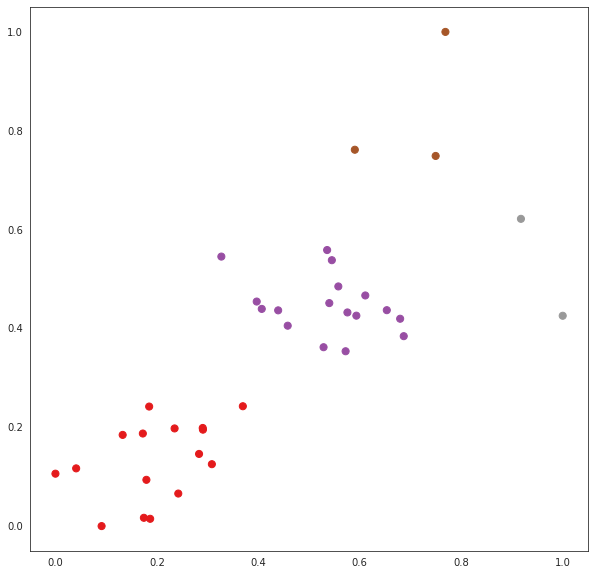

In [44]:
fig = plt.figure(figsize=(10, 10))

# colors = map(lambda x: colmap[x+1], labels)
plt.scatter(df['Disposable Income'], df['Cost of Living'], c=labelscol,
            s=50, cmap='Set1');

plt.show()

In [45]:
#altering dataframe to plot in seaborn with labels of countries
df['labels'] = pd.Series(labelscol, index=df.index)
df['Country'] = df.index

df['Healthcare Access'] = combined['Health Care Coverage 2015']

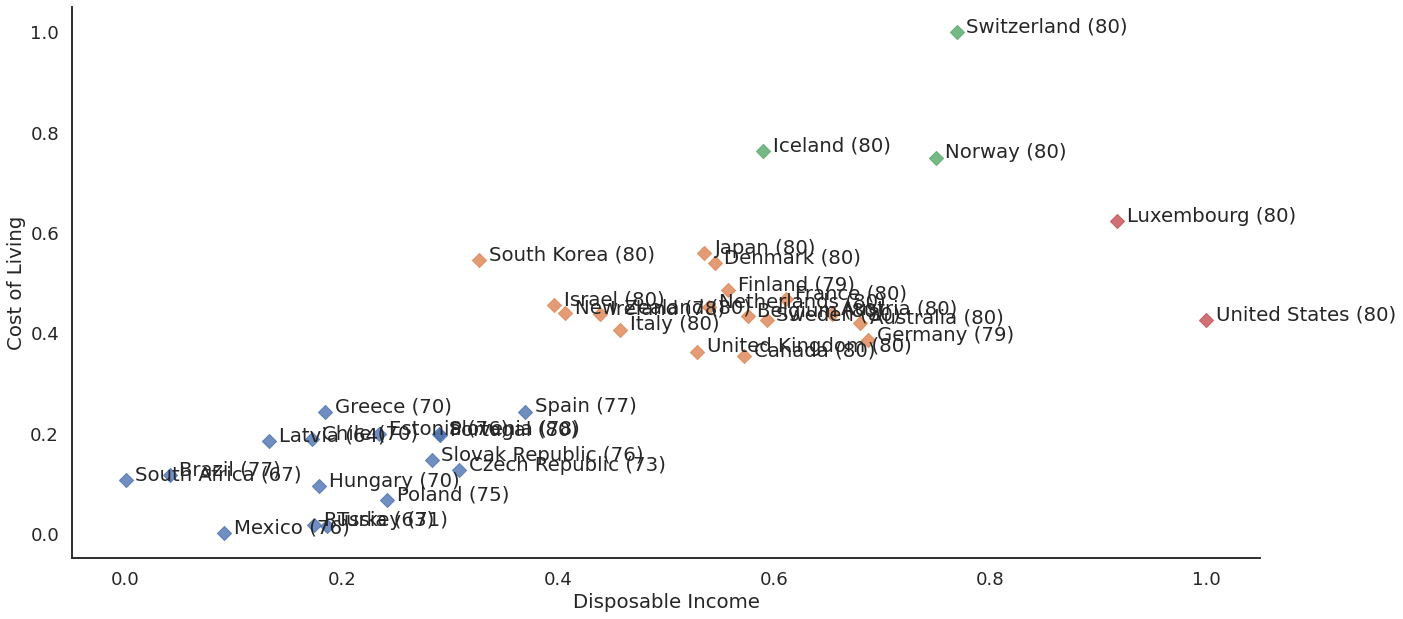

In [46]:
sns.set_context("talk",font_scale=1.1) #talk is a preset style for projection based talks/presentations, adjusting font scale because adjusting aspect ratio below made it too small to read.

ax = sns.lmplot('Disposable Income', # Horizontal axis
                'Cost of Living', # Vertical axis
                data=df, # Data source
                fit_reg=False, # Don't fix a regression line
                size = 9, #adjusting the size of the figure
                aspect =2, #adjusting the aspect ratio of the figure
                hue="labels", #loading in the clusters
                palette = "deep", #Color of points
                markers="D", #Diamond shows color the best
                scatter_kws={"s": 100},
                legend = False) # size and dimension


def label_point(x, y, val, ax): #function to add point labels to the graph
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.009, point['y'], str(point['val'])) #the +int is the drift of the text from the point, needs to be changed based on scale of data!

label_point(df['Disposable Income'], df['Cost of Living'], df['Country'].astype(str)+' ('+df['Healthcare Access'].astype(str)+')', plt.gca())

#plot of k means cluster with countries labeled

The desirable location to be on this graph is the lower right hand corner, that is where the cost of living is the lowest and the disposable income is the highest. However, keep in mind that disposable income is the income after taxes and paying into healthcare/social services. In countries with higher income taxes for these services which cost no addtional money after taxes (e.g., UK, Sweden, etc) their disposable income seems lower. An additional comparison by healthcare type (a cost not covered in the cost of living index) would be useful to determine if that is an additional influencing factor in the results shown here. The closest available data is health care coverage, which is percentage (up to 80%) of the population with access to health care (government provided or private). As expected, countries with higher levels (80% and some 79%) are in the top right corner, while countries less than that are in the lower left. The out of pocket health care costs would be an additional burden in these countries that already have a low disposable income despite also having a lower cost of living.

Regardless, Switzerland has the highest cost of living compared to the rest of the countries, meaning that their disposable income does not buy them as much as other countries in their cluster. Meanwhile, those in the cluster in the lower left hand corner have a low income and a low cost of living, particularly South Africa and Brazil, which is also not desirable. Those in the far right of the lowest cluster (e.g., Spain, Czech Republic, etc) are living relatively well for their cluster, as the income is higher while the cost of living is still relatively low.

### K-Means Clustering of Happy Life Years vs Quality of Support Network

Happy Life Years is the Life Expectancy multiplied by the Experienced Wellbeing, where:
Life expectancy: the average number of years an infant born in that country is expected to live if prevailing patterns of age-specific mortality rates at the time of birth in the country stay the same throughout the infant’s life.2 Life expectancy is commonly used as an overall indicator of the standard of health in a country. 

Experienced wellbeing: the average of all responses from within the population to the following question: “Please imagine a ladder with steps numbered from zero at the bottom to 10 at the top. Suppose we say that the top of the ladder represents the best possible life for you; and the bottom of the ladder represents the worst possible life for you. On which step of the ladder do you feel you personally stand at the present time, assuming that the higher the step the better you feel about your life, and the lower the step the worse you feel about it? Which step comes closest to the way you feel?” This measure of wellbeing is commonly used as an indicator of how people’s lives are going overall.

This experienced wellbeing is the same as life satisfaction in the OECD index, but the data are for different years.

We wanted to compare this against Quality of Support Network, with data labels incating life expectancy (1 componant of Happy Life Years). 

In [47]:
df2= combinedminmax[['(Community,   Quality of support network, Percentage)','Happy Life Years']]
df2.columns =['Quality of Support Network','Happy Life Years']


In [48]:
#K Means Clustering on Income vs Cost of Living
kmeans = KMeans(n_clusters=4)
kmeans.fit(df2)
labels = kmeans.predict(df2)
centroids = kmeans.cluster_centers_

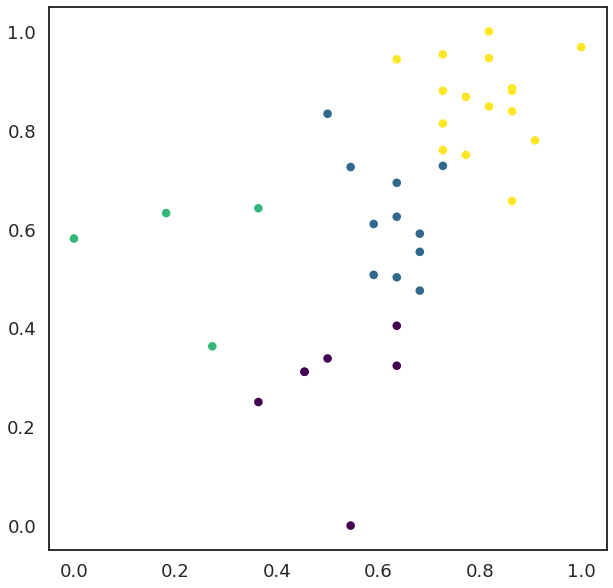

In [49]:
fig = plt.figure(figsize=(10, 10))

# colors = map(lambda x: colmap[x+1], labels)
plt.scatter(df2['Quality of Support Network'], df2['Happy Life Years'], c=labels,
            s=50, cmap='viridis');

plt.show()

In [50]:
#altering dataframe to plot in seaborn with labels of countries
df2['labels'] = pd.Series(labels, index=df2.index)
df2['Country'] = df2.index
df2['Life Expectancy'] = combined['(Health,   Life expectancy, Years)']

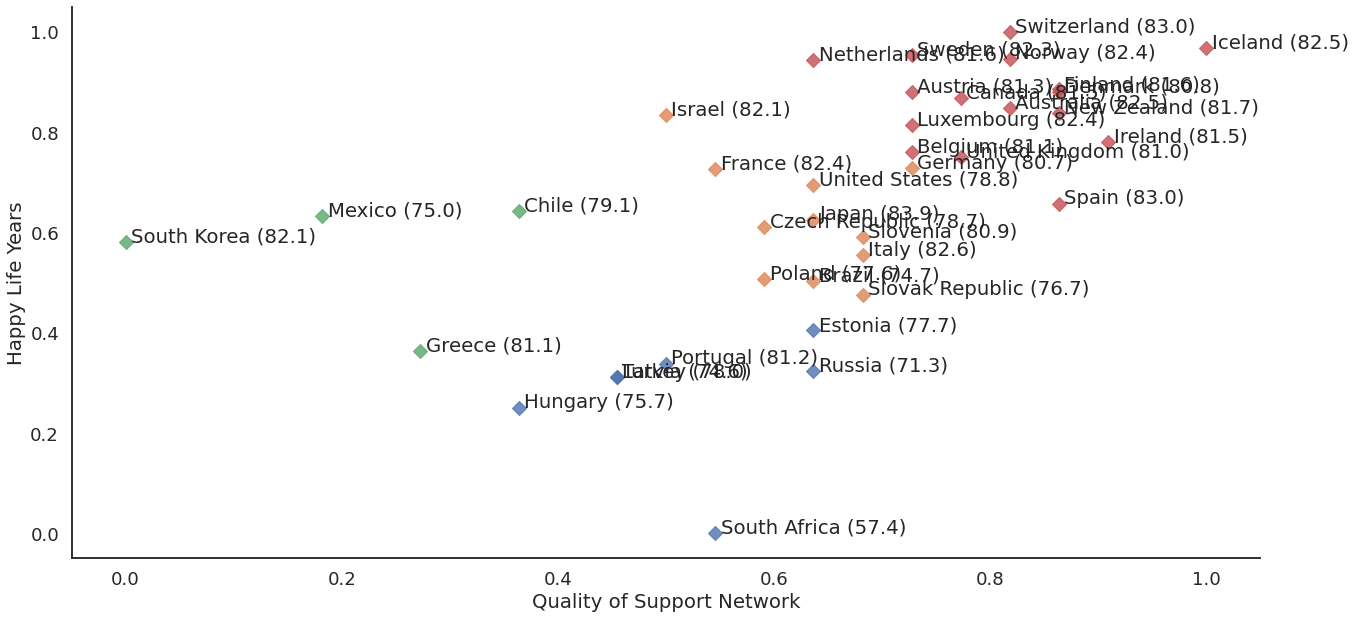

In [51]:
sns.set_context("talk",font_scale=1.1) #talk is a preset style for projection based talks/presentations, adjusting font scale because adjusting aspect ratio below made it too small to read.

ax = sns.lmplot('Quality of Support Network', # Horizontal axis
                'Happy Life Years', # Vertical axis
                data=df2, # Data source
                fit_reg=False, # Don't fix a regression line
                size = 9, #adjusting the size of the figure
                aspect =2, #adjusting the aspect ratio of the figure
                hue="labels", #loading in the clusters
                palette = "deep", #Color of points
                markers="D", #Diamond shows color the best
                scatter_kws={"s": 100},
                legend = False) # size and dimension


def label_point(x, y, val, ax): #function to add point labels to the graph
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.005, point['y'], str(point['val'])) #the +int is the drift of the text from the point, needs to be changed based on scale of data!

label_point(df2['Quality of Support Network'], df2['Happy Life Years'], df2['Country'].astype(str)+' ('+df2['Life Expectancy'].astype(str)+')' , plt.gca())

#plot of k means cluster with countries labeled
#paratheses are life expectancy in years

In this graph, it is most desirable to be in the top right corner, where there is a high level of quality support networks reported on average and more happy life years. Although life expectancy is included in the happy life years, we have also included it in the parenthetical information in the graph to show that 



With existing OECD data, it would be easy enough to calculate a Happy Life Years indicator (Life Satisfaction X Life Expectancy), which would add valuable data for researchers to use.

##Limitations
Length of time and limited domain expertise constituted the major limitations of this project. Also, the BLI data itself just looks at a limited number of countries. 


##Areas for Future Study
During this project we identified several areas for future study. First, a temporal analysis looking at countries or indicators over time could be done. This would be useful to see how countries are (or are not) improving in certain areas. South Africa, for instance, consistently ranks low and and reports low numbers for indicators. What change has there been since 2011, when the BLI started? Another study could look the relationship between objective and subjective determiners of well-being. 

##Conclusion
In this study, we explored the data set from the OECD's Better Life Index to determine if adding additional metrics would enhance the data. After comparison analyses, the results indicate that adding metrics such as Healthcare Coverage and Cost of Living add value and enhance researchers or policymakers' investigations into programs and policies to enhance well-being.

# References
Carvalhal Monteiro, R. L., Pereira, V., & Costa, H. G. (2018). Analysis of the better life index through a cluster algorithm. Social Indicators Research, 1-30.

Cost of living index. (2019). *Numbeo*. Retrieved from https://www.numbeo.com/cost-of-living/rankings.jsp

Høyland, B., Moene, K., & Willumsen, F. (2012). The tyranny of international index rankings. Journal of Development economics, 97(1), 1-14.

New Economics Foundation. (2016). The happy planet index 2016. Happy Planet Index. Retrieved from http://happyplanetindex.org

OECD (2013). Composite Indicator. *OECD*. https://stats.oecd.org/glossary/detail.asp?ID=6278

OECD (2018). Measuring well-being and progress: Well-being research. *OECD*. Retrieved from http://www.oecd.org/statistics/measuring-well-being-and-progress.htm

OECD.Stat. (2019). Better life index: 2017 edition. *OECD.Stat*. Retrieved from https://stats.oecd.org/index.aspx?DataSetCode=BLI

World Bank. (2017). Universal health coverage data set. *World Bank*. Retrieved from http://datatopics.worldbank.org/universal-health-coverage/